In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm 
import statistics
from sklearn.preprocessing import LabelEncoder

# Section 0:
## initialization and basic data extraction 

In [2]:
#Init dataframe 
birds = pd.read_excel("2007-2017 bird watch data.xlsx")
#Find all columns 
list(birds.columns)

['Admin_Unit_Code',
 'Sub_Unit_Code',
 'Site_Name',
 'Plot_Name',
 'Location_Type',
 'Year',
 'Date',
 'Start_Time',
 'End_Time',
 'Observer',
 'Visit',
 'Interval_Length',
 'ID_Method',
 'Distance',
 'Flyover_Observed',
 'Sex',
 'Common_Name',
 'Scientific_Name',
 'AcceptedTSN',
 'NPSTaxonCode',
 'AOU_Code',
 'PIF_Watchlist_Status',
 'Regional_Stewardship_Status',
 'Temperature',
 'Humidity',
 'Sky',
 'Wind',
 'Disturbance',
 'Initial_Three_Min_Cnt']

In [3]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14230 entries, 0 to 14229
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              14230 non-null  object        
 1   Sub_Unit_Code                0 non-null      float64       
 2   Site_Name                    2801 non-null   object        
 3   Plot_Name                    14230 non-null  object        
 4   Location_Type                14230 non-null  object        
 5   Year                         14230 non-null  int64         
 6   Date                         14230 non-null  datetime64[ns]
 7   Start_Time                   14230 non-null  datetime64[ns]
 8   End_Time                     14230 non-null  datetime64[ns]
 9   Observer                     14230 non-null  object        
 10  Visit                        14230 non-null  int64         
 11  Interval_Length              14230 non-nu

# Section 1:
## Common birds

In [4]:
#Most and least common birds spotted
top_five = birds['Common_Name'].value_counts().head(5)
bottom_five = birds['Common_Name'].value_counts().tail(5)
print('top five most commonly spotted:\n{}'.format(top_five))
print('bottom five most commonly spotted:\n{}'.format(bottom_five))

top five most commonly spotted:
Common_Name
Northern Cardinal     914
Indigo Bunting        891
Field Sparrow         881
American Goldfinch    869
Chipping Sparrow      685
Name: count, dtype: int64
bottom five most commonly spotted:
Common_Name
Cooper's Hawk                  1
Unidentified Owl               1
Black-throated Blue Warbler    1
Summer Tanager                 1
Yellow-rumped Warbler          1
Name: count, dtype: int64


In [5]:
#Birds spotted each year
birds.groupby('Year')['Common_Name'].count()

Year
2007     197
2008     202
2009     160
2010     174
2011     160
2012     151
2013     198
2014     493
2015    4253
2016    3942
2017    4300
Name: Common_Name, dtype: int64

In [6]:
#Northern Cardinal spotting over time 
birds[birds['Common_Name'] == 'Northern Cardinal'].groupby('Year').size()

Year
2007     17
2008     13
2009     14
2010     12
2011      8
2012     15
2013     15
2014     51
2015    250
2016    250
2017    269
dtype: int64

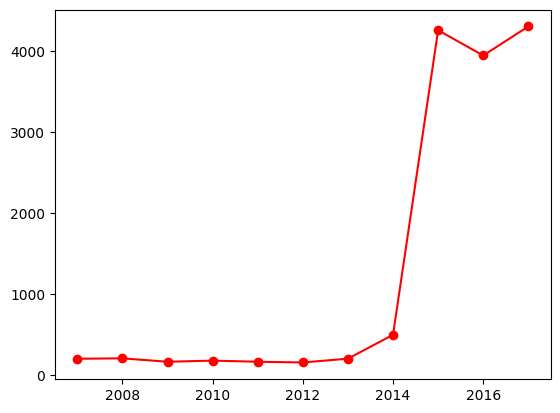

In [7]:
plt.plot(birds[['Common_Name','Year']].groupby('Year').size(), marker='o', linestyle='-', color='red', label='All bird sightings')

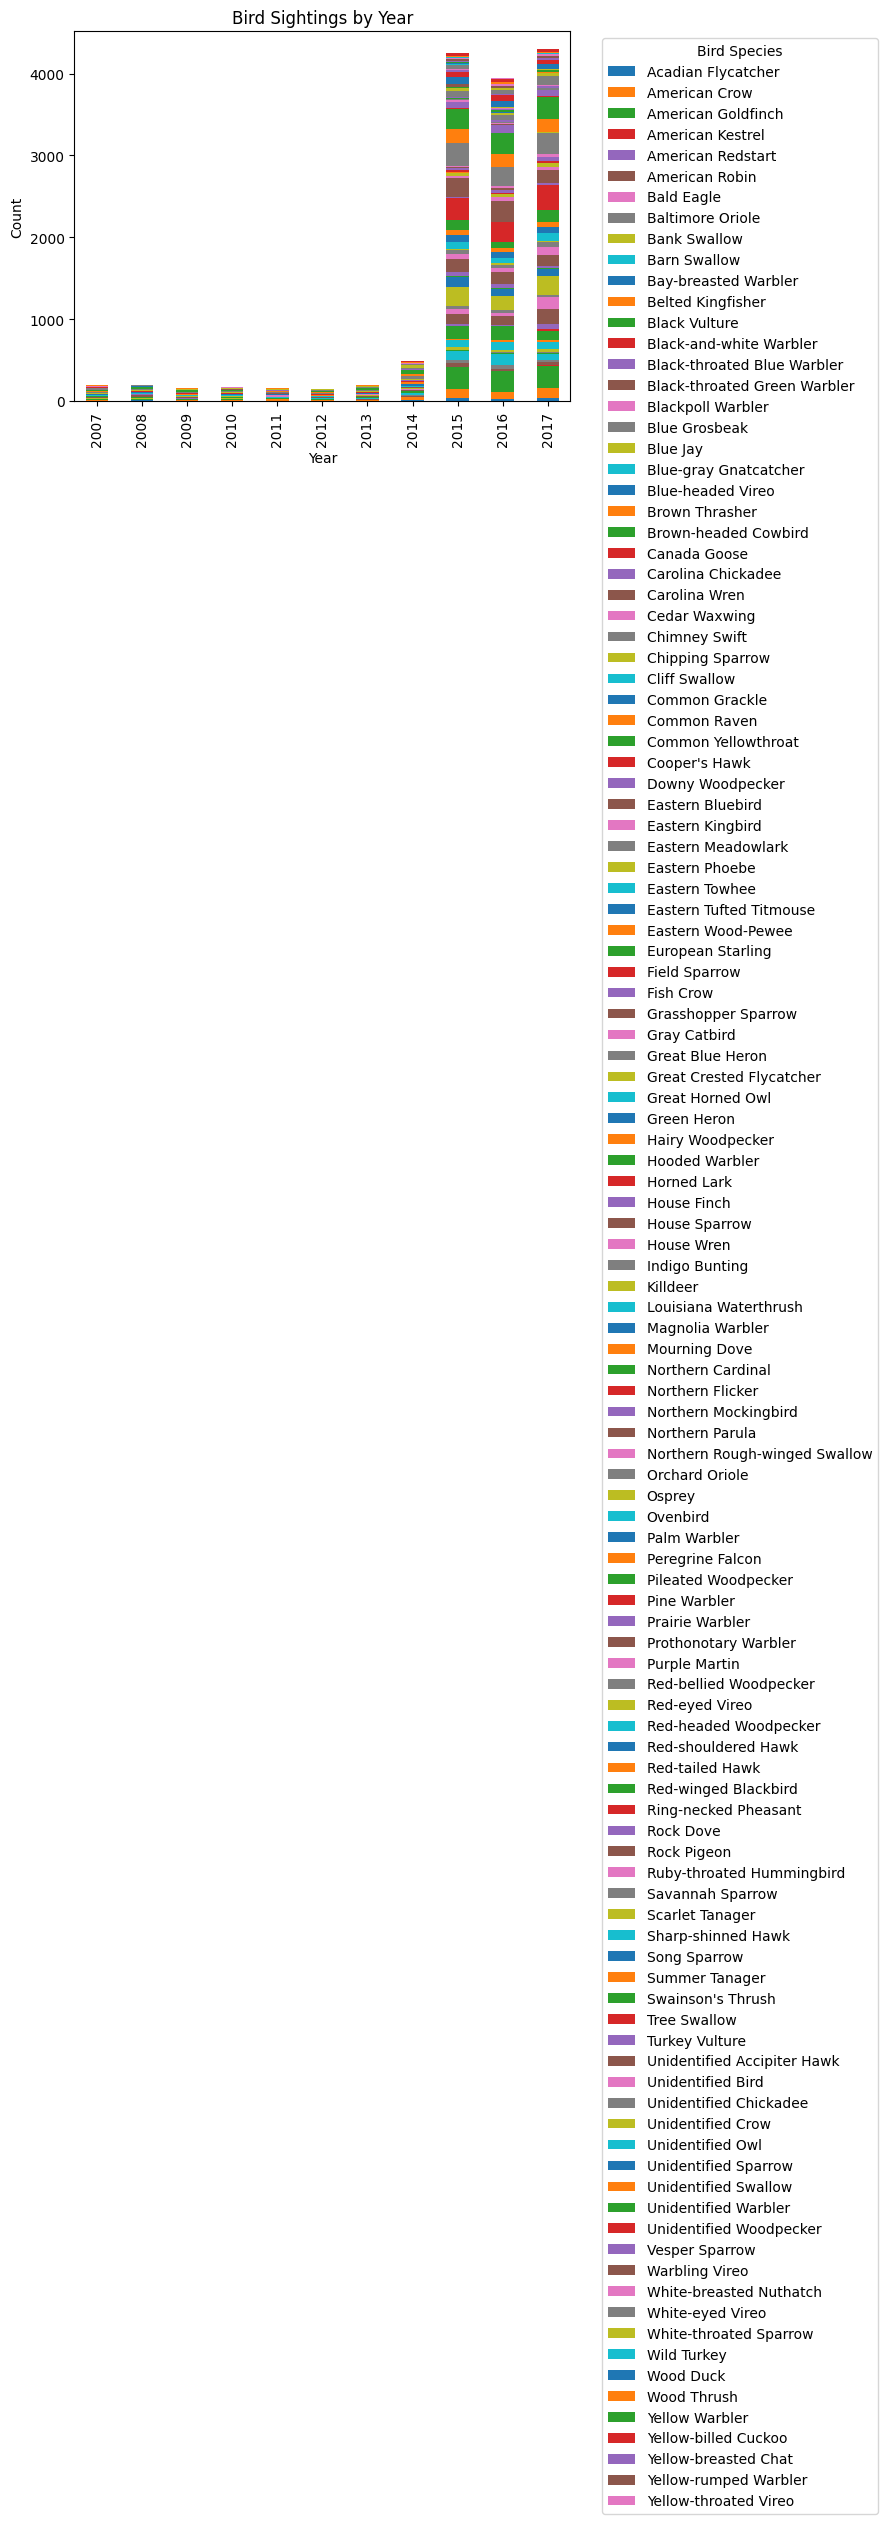

In [8]:
bird_count_by_year = birds.groupby(['Year', 'Common_Name']).size().unstack().fillna(0)
bird_count_by_year.plot(kind='bar', stacked=True)
plt.title('Bird Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Bird Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Subsection 1.1:
## Graphing common bird data and seperation into two distinct time periods

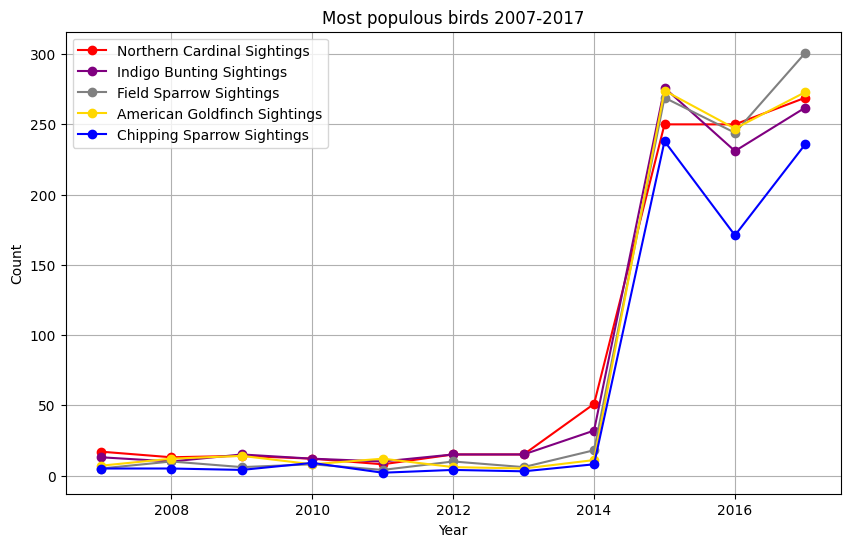

In [9]:
#plot of the top 5 most sited birds
plt.figure(figsize=(10, 6))
plt.plot(birds[birds['Common_Name'] == 'Northern Cardinal'].groupby('Year').size(), marker='o', linestyle='-', color='red', label='Northern Cardinal Sightings')
plt.plot(birds[birds['Common_Name'] == 'Indigo Bunting'].groupby('Year').size(), marker='o', linestyle='-', color='purple', label='Indigo Bunting Sightings')
plt.plot(birds[birds['Common_Name'] == 'Field Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='grey', label='Field Sparrow Sightings')
plt.plot(birds[birds['Common_Name'] == 'American Goldfinch'].groupby('Year').size(), marker='o', linestyle='-', color='gold', label='American Goldfinch Sightings')
plt.plot(birds[birds['Common_Name'] == 'Chipping Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='blue', label='Chipping Sparrow Sightings')
plt.title('Most populous birds 2007-2017')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
birds_early = birds[(birds['Year'] >= 2007) & (birds['Year'] <= 2014) & (birds['Common_Name'])]
birds_late = birds[(birds['Year'] > 2014) & (birds['Common_Name'])]

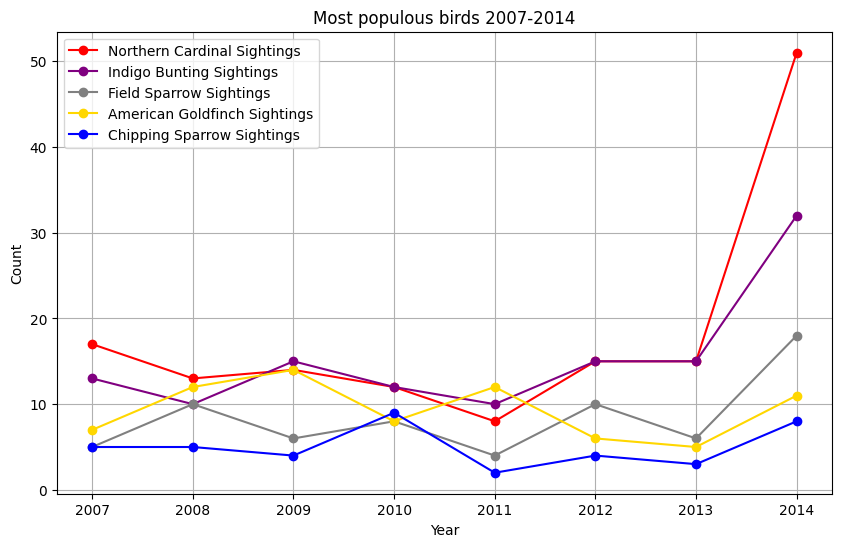

In [11]:
#plot of the top 5 most sited birds
plt.figure(figsize=(10, 6))
plt.plot(birds_early[birds_early['Common_Name'] == 'Northern Cardinal'].groupby('Year').size(), marker='o', linestyle='-', color='red', label='Northern Cardinal Sightings')
plt.plot(birds_early[birds_early['Common_Name'] == 'Indigo Bunting'].groupby('Year').size(), marker='o', linestyle='-', color='purple', label='Indigo Bunting Sightings')
plt.plot(birds_early[birds_early['Common_Name'] == 'Field Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='grey', label='Field Sparrow Sightings')
plt.plot(birds_early[birds_early['Common_Name'] == 'American Goldfinch'].groupby('Year').size(), marker='o', linestyle='-', color='gold', label='American Goldfinch Sightings')
plt.plot(birds_early[birds_early['Common_Name'] == 'Chipping Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='blue', label='Chipping Sparrow Sightings')
plt.title('Most populous birds 2007-2014')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

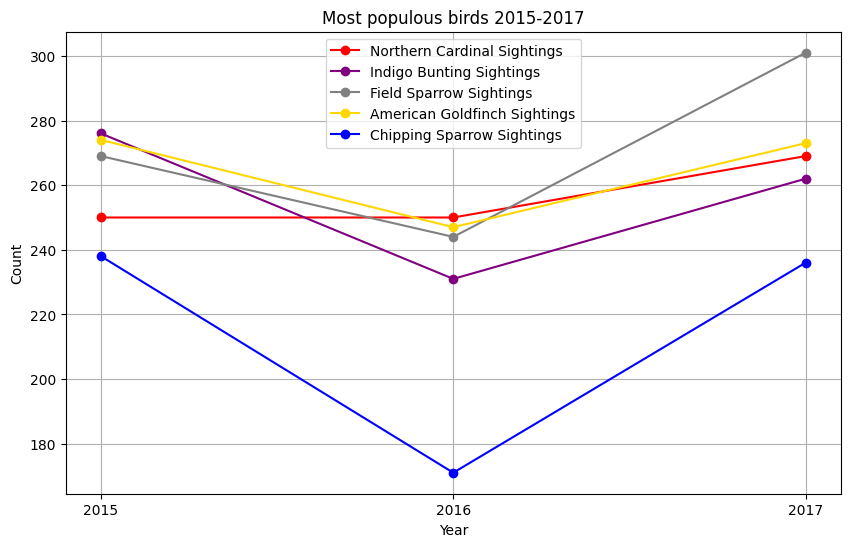

In [12]:
#plot of the top 5 most sited birds
plt.figure(figsize=(10, 6))
plt.plot(birds_late[birds_late['Common_Name'] == 'Northern Cardinal'].groupby('Year').size(), marker='o', linestyle='-', color='red', label='Northern Cardinal Sightings')
plt.plot(birds_late[birds_late['Common_Name'] == 'Indigo Bunting'].groupby('Year').size(), marker='o', linestyle='-', color='purple', label='Indigo Bunting Sightings')
plt.plot(birds_late[birds_late['Common_Name'] == 'Field Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='grey', label='Field Sparrow Sightings')
plt.plot(birds_late[birds_late['Common_Name'] == 'American Goldfinch'].groupby('Year').size(), marker='o', linestyle='-', color='gold', label='American Goldfinch Sightings')
plt.plot(birds_late[birds_late['Common_Name'] == 'Chipping Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='blue', label='Chipping Sparrow Sightings')
plt.title('Most populous birds 2015-2017')
#change the ticks of x to only be whole numbers
plt.xticks(range(min(birds_late['Year']), max(birds_late['Year'])+1, 1))
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
birds_late['ID_Method'].value_counts()

ID_Method
Singing          5883
Visualization    3533
Calling          3076
Name: count, dtype: int64

In [29]:
birds_early['ID_Method'].value_counts()

ID_Method
Singing          835
Calling          675
Visualization    112
Name: count, dtype: int64

# SubSection 1.2:
## Data about the Observers

In [13]:
birds['Common_Name'].groupby(birds['Observer']).value_counts()

Observer       Common_Name         
Allison Hanna  Field Sparrow           71
               American Goldfinch      58
               Chipping Sparrow        50
               Northern Cardinal       47
               Grasshopper Sparrow     45
                                       ..
Zach Ladin     Grasshopper Sparrow      1
               Eastern Kingbird         1
               Downy Woodpecker         1
               Common Raven             1
               Yellow-billed Cuckoo     1
Name: count, Length: 1195, dtype: int64

<Axes: xlabel='Observer'>

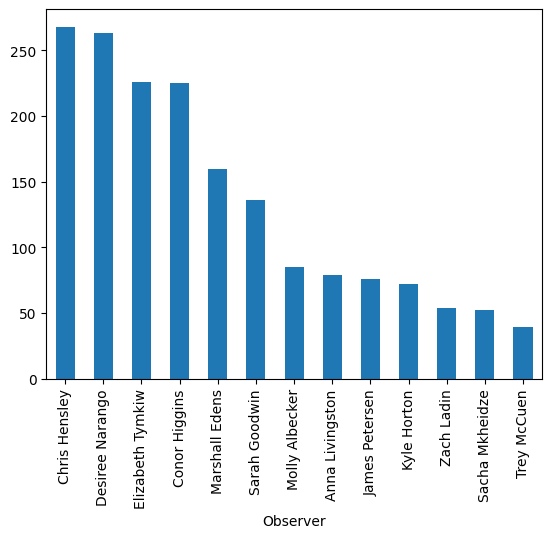

In [14]:
birds_early['Observer'].value_counts().plot(kind='bar')

<Axes: xlabel='Observer'>

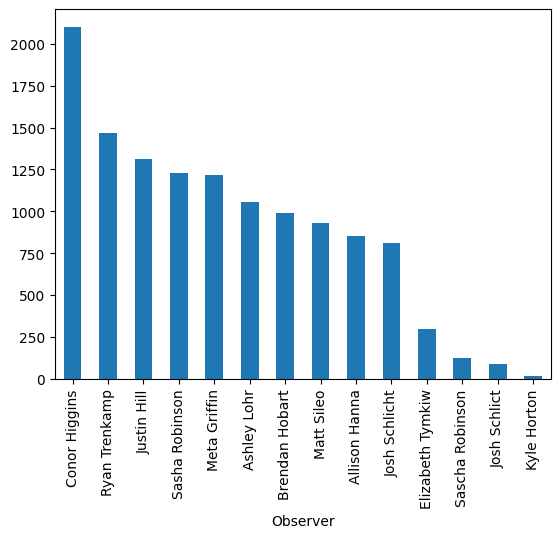

In [15]:
birds_late['Observer'].value_counts().plot(kind='bar')

In [97]:
late_observers = birds_late['Observer'].unique()

In [98]:
early_observers = birds_early['Observer'].unique()

In [107]:
print(late_observers.size)
print(early_observers.size)
print(type(early_observers))

14
13
<class 'numpy.ndarray'>


In [111]:
for i in range(14):
        for j in range(13):
            if(late_observers[i] == early_observers[j]):
                print(late_observers[i])

Conor Higgins
Kyle Horton
Elizabeth Tymkiw


In [123]:
print("late spotting data for: ")
print("Conor Higgins: {}".format(birds_late['Observer'].value_counts()['Conor Higgins']))
print("Elizabeth Tymkiw: {}".format(birds_late['Observer'].value_counts()['Elizabeth Tymkiw']))
print("Kyle Horton: {}".format(birds_late['Observer'].value_counts()['Kyle Horton']))
print("average: {}".format(2415 / 3))
print("late spotting data for: ")
print("Conor Higgins: {}".format(birds_early['Observer'].value_counts()['Conor Higgins']))
print("Elizabeth Tymkiw: {}".format(birds_early['Observer'].value_counts()['Elizabeth Tymkiw']))
print("Kyle Horton: {}".format(birds_early['Observer'].value_counts()['Kyle Horton']))
print("average: {}".format(523 / 8))

late spotting data for: 
Conor Higgins: 2103
Elizabeth Tymkiw: 298
Kyle Horton: 14
early spotting data for: 
late spotting data for: 
Conor Higgins: 225
Elizabeth Tymkiw: 226
Kyle Horton: 72


# Section 3:
## Data on the spotting of rare birds

In [16]:
#Extract an excel that only has birds which where spotted less than 10 times
rare_bird_data = birds[birds['Common_Name'].isin(birds['Common_Name'].value_counts()[birds['Common_Name'].value_counts() < 10].index)]
rare_bird_data.to_excel('Rare Bird Data.xlsx')
print(rare_bird_data)

      Admin_Unit_Code  Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
33               ANTI            NaN    ANTI 2  ANTI-0207        Forest  2008   
119              ANTI            NaN    ANTI 2  ANTI-0207        Forest  2017   
244              ANTI            NaN    ANTI 2  ANTI-0207        Forest  2012   
250              ANTI            NaN    ANTI 2  ANTI-0207        Forest  2010   
286              ANTI            NaN    ANTI 2  ANTI-0207        Forest  2014   
...               ...            ...       ...        ...           ...   ...   
13252            ANTI            NaN       NaN  ANTI-0191     Grassland  2017   
13767            ANTI            NaN       NaN  ANTI-0028     Grassland  2017   
13798            ANTI            NaN       NaN  ANTI-0189     Grassland  2017   
14123            ANTI            NaN       NaN  ANTI-0085     Grassland  2017   
14128            ANTI            NaN       NaN  ANTI-0085     Grassland  2017   

            Date          S

In [17]:
#All birds which have been spotted less than 10 times
rare_bird = birds['Common_Name'].value_counts()[birds['Common_Name'].value_counts() < 10].to_csv('Rare birds.csv')
rare_bird_spotters = birds['Common_Name'].groupby(birds['Observer']).value_counts()[birds['Common_Name'].groupby(birds['Observer']).value_counts() < 10].to_csv('Rare bird Spotters.csv')
rare_birds = pd.read_csv('Rare birds.csv')
rare_bird_spotters = pd.read_csv('Rare bird Spotters.csv')

In [18]:
print(rare_bird_spotters)

          Observer             Common_Name  count
0    Allison Hanna            Tree Swallow      9
1    Allison Hanna  Unidentified Chickadee      9
2    Allison Hanna          Warbling Vireo      8
3    Allison Hanna        Downy Woodpecker      8
4    Allison Hanna       Unidentified Bird      8
..             ...                     ...    ...
814     Zach Ladin     Grasshopper Sparrow      1
815     Zach Ladin        Eastern Kingbird      1
816     Zach Ladin        Downy Woodpecker      1
817     Zach Ladin            Common Raven      1
818     Zach Ladin    Yellow-billed Cuckoo      1

[819 rows x 3 columns]


In [19]:
rare_bird_data['Common_Name'].value_counts()

Common_Name
Great Blue Heron                8
Common Raven                    7
Yellow-throated Vireo           6
Cliff Swallow                   5
American Kestrel                5
Purple Martin                   5
Unidentified Swallow            5
Unidentified Warbler            4
Blackpoll Warbler               4
Red-headed Woodpecker           3
Bank Swallow                    3
Sharp-shinned Hawk              3
Peregrine Falcon                2
Osprey                          2
Ring-necked Pheasant            2
Wood Duck                       2
Pine Warbler                    2
Great Horned Owl                2
Swainson's Thrush               2
Hooded Warbler                  2
White-eyed Vireo                2
Belted Kingfisher               2
American Redstart               2
Blue-headed Vireo               2
Magnolia Warbler                2
Green Heron                     1
Black-throated Green Warbler    1
Yellow Warbler                  1
Prothonotary Warbler            1
Bl

<Axes: xlabel='Observer'>

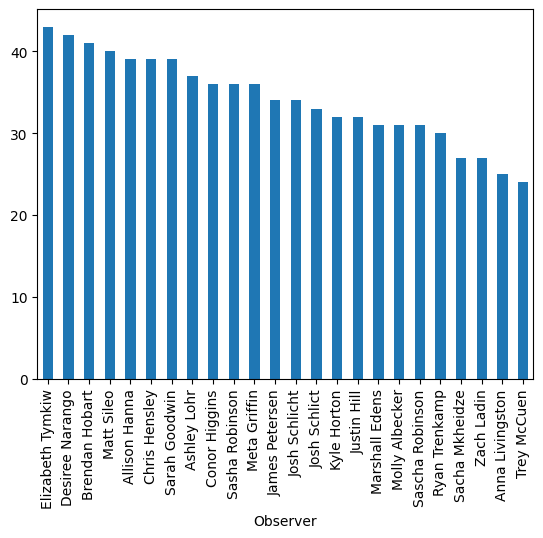

In [20]:
rare_bird_spotters['Observer'].value_counts().plot(kind='bar')

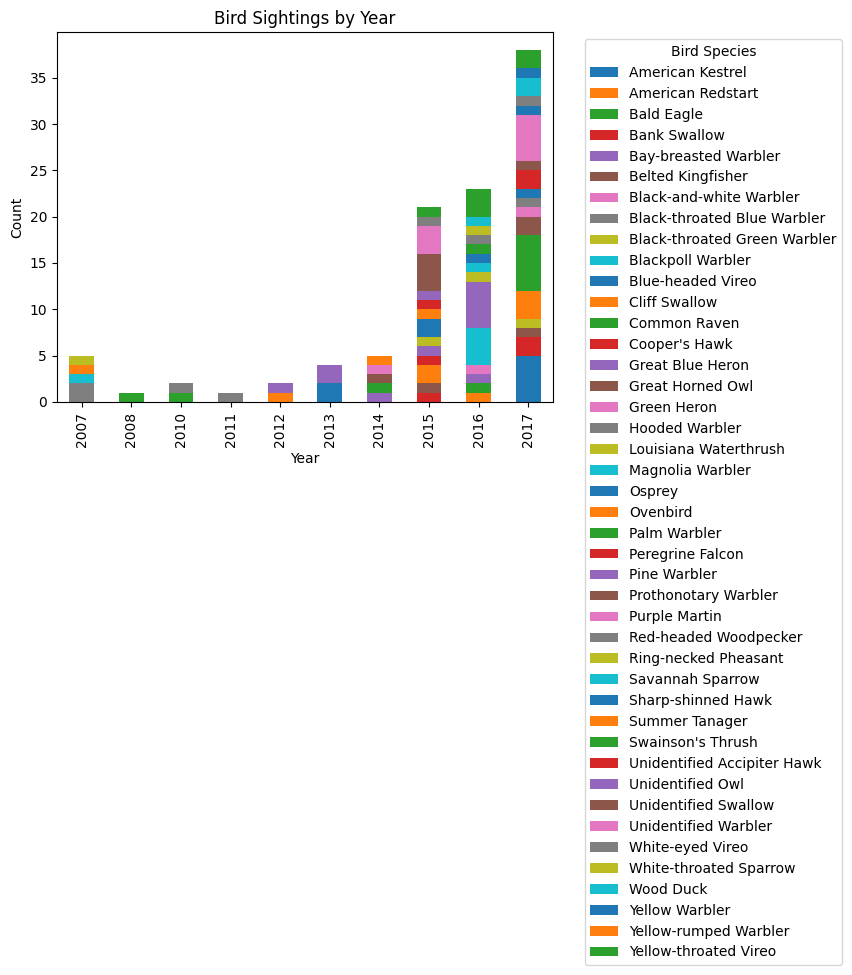

In [21]:
rare_bird_count_by_year = rare_bird_data.groupby(['Year', 'Common_Name']).size().unstack().fillna(0)
rare_bird_count_by_year.plot(kind='bar', stacked=True)
plt.title('Bird Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Bird Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [22]:
rare_bird_count_by_year.to_excel('Rare Bird Count by Year.xlsx')

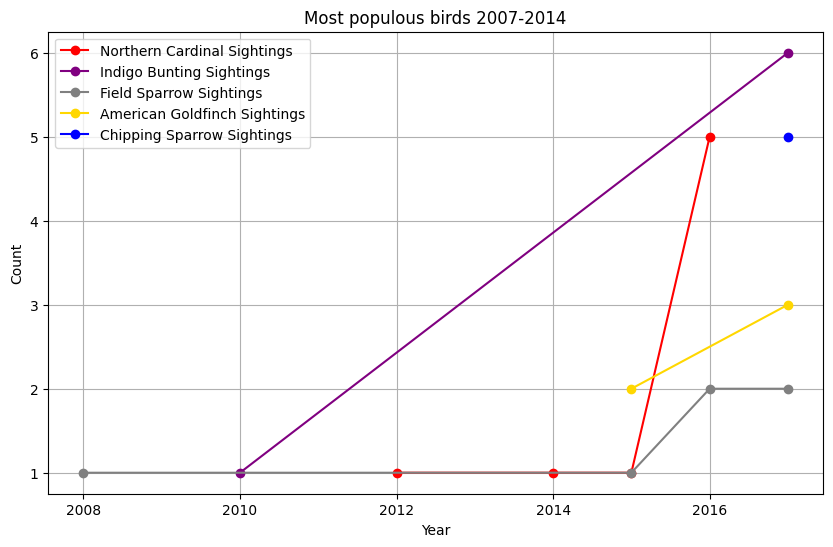

In [24]:
#plot of the top 5 most sited birds
plt.figure(figsize=(10, 6))
plt.plot(rare_bird_data[rare_bird_data['Common_Name'] == 'Great Blue Heron'].groupby('Year').size(), marker='o', linestyle='-', color='red', label='Northern Cardinal Sightings')
plt.plot(rare_bird_data[rare_bird_data['Common_Name'] == 'Common Raven'].groupby('Year').size(), marker='o', linestyle='-', color='purple', label='Indigo Bunting Sightings')
plt.plot(rare_bird_data[rare_bird_data['Common_Name'] == 'Yellow-throated Vireo'].groupby('Year').size(), marker='o', linestyle='-', color='grey', label='Field Sparrow Sightings')
plt.plot(rare_bird_data[rare_bird_data['Common_Name'] == 'Cliff Swallow'].groupby('Year').size(), marker='o', linestyle='-', color='gold', label='American Goldfinch Sightings')
plt.plot(rare_bird_data[rare_bird_data['Common_Name'] == 'American Kestrel'].groupby('Year').size(), marker='o', linestyle='-', color='blue', label='Chipping Sparrow Sightings')
plt.title('Most populous birds 2007-2014')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

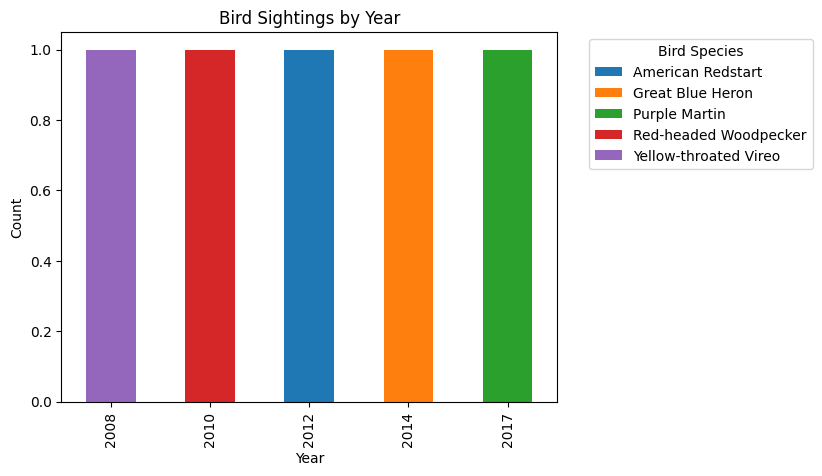

In [25]:
rare_bird_count_by_year = rare_bird_data.head().groupby(['Year', 'Common_Name']).size().unstack().fillna(0)
rare_bird_count_by_year.plot(kind='bar', stacked=True)
plt.title('Bird Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Bird Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

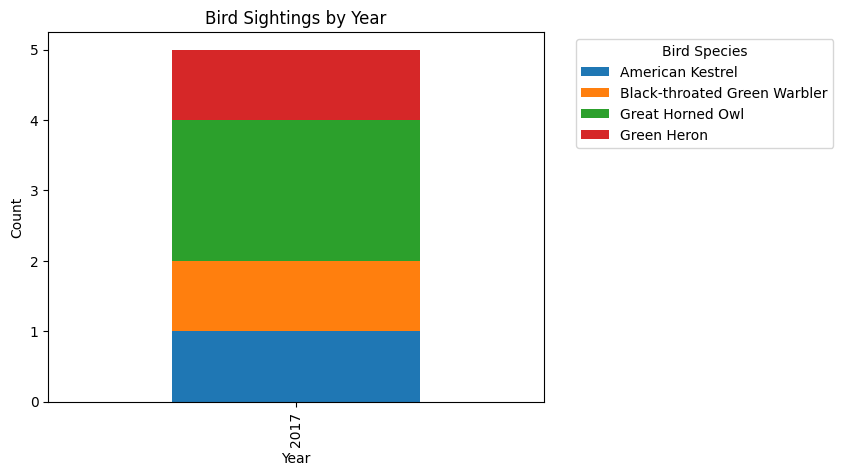

In [26]:
rare_bird_count_by_year = rare_bird_data.tail().groupby(['Year', 'Common_Name']).size().unstack().fillna(0)
rare_bird_count_by_year.plot(kind='bar', stacked=True)
plt.title('Bird Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Bird Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()